In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sndata.csp import DR1
dr1 = DR1()
import pandas as pd
from astropy.io import ascii
import scipy.stats as stats

This code, once completed, should produce a plot that shows the Bronder 2008 results vs. the measurements for obtained in this experiment. First, the data is read in and the table of results is produced. 

In [9]:
output_file_data = pd.read_csv("/Users/anish/Desktop/results/anish_csp.csv")
output_file_data
#prints out the table of saved data for the scripts program


,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,notes
0,2004ef,2453255.66,pW1,3762.787900,4068.865400,4262.146830,0.0,1341.168849,10.200355,0.0,19.901073,4.404554e-15,0.0,8.889777e-15,NaN
1,2004ef,2453255.66,pW2,3929.081900,4068.865400,NaN,0.0,NaN,12.432846,0.0,3.538539,7.091278e-15,0.0,2.246094e-15,NaN
2,2004ef,2453255.66,pW3,4073.685500,4466.525100,13225.623532,0.0,161.814243,88.346404,0.0,6.506680,5.483887e-14,0.0,5.200474e-15,NaN
3,2004ef,2453255.66,pW4,4500.266000,5061.809800,21906.333775,0.0,241.564916,174.768556,0.0,7.198777,9.398515e-14,0.0,5.704729e-15,NaN
4,2004ef,2453255.66,pW5,5155.802100,5601.663000,9043.079766,0.0,112.683776,81.630045,0.0,2.541775,2.970750e-14,0.0,1.135316e-15,NaN
5,2004ef,2453255.66,pW6,5616.123400,5845.079000,11631.254857,0.0,122.434269,25.582235,0.0,2.341335,7.575255e-15,0.0,7.789089e-16,NaN
6,2004ef,2453255.66,pW7,5842.668900,6401.802700,15212.361167,0.0,55.340949,156.664130,0.0,7.954258,4.701931e-14,0.0,3.245206e-15,NaN
7,2004eo,2453267.52,pW4,4521.645200,5191.614100,17649.913419,0.0,91.640942,190.091577,0.0,2.393263,1.006811e-13,0.0,1.722760e-15,NaN
8,2004eo,2453267.52,pW5,5191.614100,5595.277300,7976.688442,0.0,160.716994,54.173288,0.0,2.430955,2.106339e-14,0.0,1.077208e-15,NaN
9,2004eo,2453267.52,pW6,5595.277300,5926.056900,9588.114897,0.0,55.984429,34.831421,0.0,1.919305,1.100466e-14,0.0,6.911855e-16,NaN


In [10]:
pew = output_file_data['pew']
pew2 = output_file_data.set_index(['obj_id', 'feat_name'])
pew2 = pew2['pew']
pew2


obj_id  feat_name
2004ef  pW1           10.200355
        pW2           12.432846
        pW3           88.346404
        pW4          174.768556
        pW5           81.630045
        pW6           25.582235
        pW7          156.664130
2004eo  pW4          190.091577
        pW5           54.173288
        pW6           34.831421
        pW7          105.840416
        pW8          256.705891
2004ey  pW1          111.875236
        pW2            8.345257
        pW3           89.787809
        pW4          132.709198
        pW5           70.909024
        pW6            9.803429
        pW7           92.981661
        pW8          146.483365
2004gs  pW1            1.274360
        pW2           30.401913
        pW4          164.049978
        pW5           76.556646
        pW6           44.383100
        pW7          132.498726
        pW8          252.239388
2004gu  pW1           74.705933
        pW2            1.632806
        pW3           89.757631
                      

The next objective is to create a dataframe of values obtained through personal measurements. There should be columns for each of the features. The 'nan' values should not be present in the final result. In order for this dataframe to be plottable, it must be matched up with the published results one. This is done through a pandas methods that will relate the object ids and pW values. Other ways of doing this could include transposing the dataframe and allowing the object ids column to line up with the pW's this way. 

In [11]:
published = dr1.get_available_tables()
dr1_table = dr1.load_table(published[3])
#dr1_table.rename_column('SN', 'obj_id')
#print(dr1_table.colnames)
pub_frame = dr1_table.to_pandas()
pub_frame.rename(columns = {'SN' : 'obj_id'}, inplace = True)
pub_frame.set_index(['obj_id'], inplace = True)
pub_frame

#pub_frame.transpose()
#pub_frame2 = pub_frame.set_index(['SN'])
#pub_frame2.transpose()


,Cl,pW1,e_pW1,pW2,e_pW2,pW3,e_pW3,pW4,e_pW4,pW5,e_pW5,pW6,e_pW6,pW7,e_pW7,pW8,e_pW8
obj_id,,,,,,,,,,,,,,,,,
2004ey,CN,107.2,5.3,13.6,1.5,96.8,1.5,129.9,3.2,91.1,3.3,14.2,1.1,99.7,3.5,65.0,16.5
2005bo,CN,NaN,NaN,16.8,1.6,85.2,3.9,134.1,5.3,80.5,2.8,23.2,1.9,99.2,1.8,158.8,5.9
2005el,CN,110.7,1.8,20.6,0.5,82.4,5.8,112.9,3.9,82.1,1.2,20.5,1.5,93.8,1.7,130.1,5.2
2005hc,CN,NaN,NaN,10.3,5.2,102.0,5.2,125.1,1.1,89.3,3.8,18.3,1.5,84.3,1.6,NaN,NaN
2005kc,CN,NaN,NaN,NaN,NaN,75.7,2.4,130.7,5.2,75.4,1.3,25.8,1.0,91.2,1.1,NaN,NaN
2005ki,CN,116.1,1.6,20.9,1.4,86.7,1.4,110.8,1.1,81.4,0.6,22.3,2.0,104.3,0.5,86.0,1.1
2005ku,CN,NaN,NaN,11.5,1.7,79.7,8.1,91.0,3.7,54.6,1.4,12.1,1.3,83.0,3.0,NaN,NaN
2005na,CN,87.7,6.2,11.0,0.5,116.7,4.8,117.1,15.4,89.6,2.4,16.3,2.0,78.7,3.8,91.4,22.5
2006D,CN,96.8,1.2,20.9,0.2,182.9,0.5,136.1,5.3,87.3,3.0,27.2,2.3,98.5,0.7,188.0,9.7


In [18]:
pub1 = np.concatenate((pub_frame['pW1'], pub_frame['pW2'], pub_frame['pW3']))
pub2 = np.concatenate((pub_frame['pW4'], pub_frame['pW5'], pub_frame['pW6']))
pub3 = np.concatenate((pub_frame['pW7'], pub_frame['pW8']))

total_pub = np.concatenate((pub1, pub2, pub3))
total_pub = total_pub[np.logical_not(np.isnan(total_pub))]
total_pub

#print(len(pew))
#print(len(total_pub))

output = output_file_data.set_index(['obj_id', 'feat_name'])
group_data = output.groupby('feat_name')
print(group_data)

data_final.head()
            

,,time,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,...,pW4,e_pW4,pW5,e_pW5,pW6,e_pW6,pW7,e_pW7,pW8,e_pW8
obj_id,feat_name,,,,,,,,,,,,,,,,,,,,,
2004eo,pW8,2453267.52,7731.3287,8507.8198,15715.098722,0.0,154.398661,256.705891,0.0,7.862314,3.295199e-14,...,165.8,6.9,82.1,0.8,37.1,2.5,117.4,5.7,192.7,15.4
2004ey,pW8,2453303.56,7936.3029,8583.7996,9783.907347,0.0,846.960311,146.483365,0.0,19.801688,1.134793e-13,...,129.9,3.2,91.1,3.3,14.2,1.1,99.7,3.5,65.0,16.5
2004gs,pW8,2453352.76,7786.6288,8568.7221,12857.516760,0.0,265.119387,252.239388,0.0,15.129677,2.939557e-14,...,197.9,3.5,87.4,2.3,47.8,3.1,134.1,1.9,243.1,18.9
2005M,pW8,2453405.71,7827.8807,8214.7483,17755.955021,0.0,114.683275,28.957206,0.0,2.472889,8.659891e-15,...,141.7,6.0,71.5,3.0,12.0,3.2,54.7,4.0,59.3,23.8
2005ag,pW8,2453413.89,7811.6286,8521.6689,16494.277003,0.0,716.451097,307.592516,0.0,94.443511,7.131608e-15,...,133.1,6.0,92.0,11.8,14.2,2.9,106.1,17.9,NaN,NaN


The final subplot is found below with plots for each feature in the spectra for objects. They were plotted using a for loop to iterate through each index in the combined dataframe, made of published and measured results. The linear regression for each pW is also found and shows a linear dependence, almost equivalent to y=x, which is a good sign since this means the measured values match up well enough with the published. 

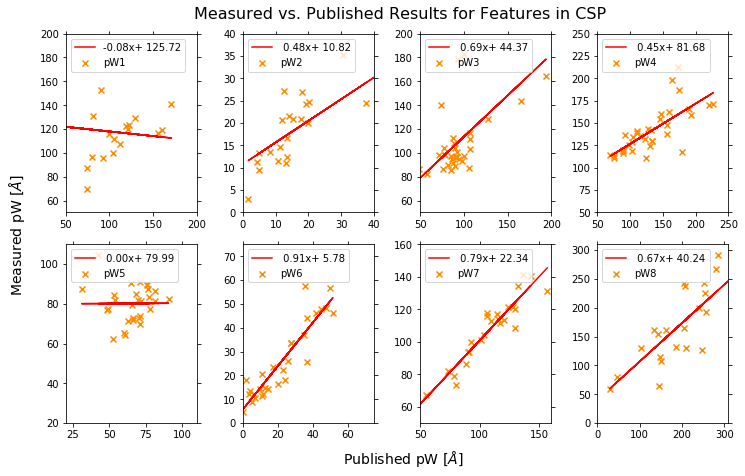

In [17]:
fig, axes = plt.subplots(2, 4, figsize = (10, 6))
pw_list = ['pW1', 'pW2', 'pW3', 'pW4', 'pW5', 'pW6', 'pW7', 'pW8', 'pew']

for (feat_name, feat_data), axis in zip(group_data, axes.flatten()): #zip matches data from both sets to each other
    data_final = feat_data.join(pub_frame) #combines measured and published dataframes
    nonan_frame = data_final[pw_list].dropna()
    axis.scatter(nonan_frame['pew'], nonan_frame[feat_name], marker = "x", color = "darkorange", label = feat_name)
    slope, intercept, r, p, s = stats.linregress(nonan_frame['pew'], nonan_frame[feat_name])
    axis.plot(nonan_frame['pew'], nonan_frame['pew']*slope + intercept, 'r-', label = f'{slope: .2f}x+{intercept: .2f}')
    axis.tick_params(top = True, right = True)
    axis.legend(loc = 'upper left')
    
axes[0, 0].set_xlim(50, 200)
axes[0, 0].set_ylim(50, 200)
axes[0, 1].set_xlim(0, 40)
axes[0, 1].set_ylim(0, 40)
axes[0, 2].set_xlim(50, 200)
axes[0, 2].set_ylim(50, 200)
axes[0, 3].set_xlim(50, 250)
axes[0, 3].set_ylim(50, 250)
axes[1, 0].set_xlim(20, 110)
axes[1, 0].set_ylim(20, 110)
axes[1, 1].set_xlim(0, 75)
axes[1, 1].set_ylim(0, 75)
axes[1, 2].set_xlim(50, 160)
axes[1, 2].set_ylim(50, 160)
axes[1, 3].set_xlim(0, 310)
axes[1, 3].set_ylim(0, 310)

fig.text(-0.03, 0.5, "Measured pW [$\AA$]", va = 'center', rotation = 'vertical', fontsize = 14)
fig.text(0.52, -0.03, "Published pW [$\AA$]", ha = 'center', fontsize = 14)
fig.text(0.23, 1, "Measured vs. Published Results for Features in CSP", fontsize = 16)
plt.tight_layout()